In [71]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as n

import sys
import os
sys.path.insert(0, 'python')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
dirname = os.getcwd()
regression_file = os.path.abspath(os.path.join(dirname, 
                                    'regression_kinase_sarfari.csv'))
regression_df = pd.read_csv(regression_file)
select_fields = ['ProtocolName', 'LabelName', 'GroupValues']
regression_df.sort_values(select_fields)

,ProtocolName,LabelName,GroupValues,Size,Estimator,RMSE,Correlation
210,ABL1,Activity Value,Assay Description:Inhibition of recombinant c-...,171,RBF libSVM folded fingerprints regression,0.695483,0.752610
211,ABL1,Activity Value,Assay Description:Inhibition of recombinant c-...,171,Elastic Net on folded fingerprints regression,0.719327,0.734015
212,ABL1,Activity Value,Assay Description:Inhibition of recombinant c-...,171,Poly Smile SVM fingerprints regression,0.720526,0.733970
213,ABL1,Activity Value,Assay Description:Inhibition of recombinant c-...,171,Tanimoto Smile SVM regression,0.735045,0.716565
214,ABL1,Activity Value,Assay Description:Inhibition of recombinant c-...,171,Weka RF folded fingerprints regression,0.760520,0.705704
215,ABL1,Activity Value,Assay Description:Inhibition of recombinant c-...,171,Weka RF descriptors regression,0.799694,0.657044
216,ABL1,Activity Value,Assay Description:Inhibition of recombinant c-...,171,RBF Smile SVM descriptors regression,0.849250,0.619793
154,AKT1,Activity Value,Assay Description:Inhibition of Akt1|Activity ...,135,RBF libSVM folded fingerprints regression,0.755459,0.813416
155,AKT1,Activity Value,Assay Description:Inhibition of Akt1|Activity ...,135,RBF Smile SVM descriptors regression,0.764835,0.809975
156,AKT1,Activity Value,Assay Description:Inhibition of Akt1|Activity ...,135,Poly Smile SVM fingerprints regression,0.769101,0.807863


In [73]:
regression_df.LabelName.value_counts()
regression_df.shape
regression_df[regression_df.Correlation.isnull()]

,ProtocolName,LabelName,GroupValues,Size,Estimator,RMSE,Correlation
504,PEK,Activity Value,Assay Description:PubChem BioAssay. Counterscr...,118,Tanimoto Smile SVM regression,0.000000e+00,NaN
505,PEK,Activity Value,Assay Description:PubChem BioAssay. Counterscr...,118,Weka RF descriptors regression,8.881784e-16,NaN
506,PEK,Activity Value,Assay Description:PubChem BioAssay. Counterscr...,118,RBF Smile SVM descriptors regression,0.000000e+00,NaN
507,PEK,Activity Value,Assay Description:PubChem BioAssay. Counterscr...,118,RBF libSVM folded fingerprints regression,0.000000e+00,NaN
508,PEK,Activity Value,Assay Description:PubChem BioAssay. Counterscr...,118,Poly Smile SVM fingerprints regression,0.000000e+00,NaN
509,PEK,Activity Value,Assay Description:PubChem BioAssay. Counterscr...,118,Elastic Net on folded fingerprints regression,7.105427e-15,NaN
510,PEK,Activity Value,Assay Description:PubChem BioAssay. Counterscr...,118,Weka RF folded fingerprints regression,5.329071e-15,NaN


In [74]:
regression_df = regression_df[~regression_df.Correlation.isnull()]

In [75]:
max_indices=regression_df.groupby(select_fields)["Correlation"].idxmax()
best_regression_df=regression_df.loc[max_indices]
best_regression_df.sort_values(select_fields)

,ProtocolName,LabelName,GroupValues,Size,Estimator,RMSE,Correlation
210,ABL1,Activity Value,Assay Description:Inhibition of recombinant c-...,171,RBF libSVM folded fingerprints regression,0.695483,0.752610
154,AKT1,Activity Value,Assay Description:Inhibition of Akt1|Activity ...,135,RBF libSVM folded fingerprints regression,0.755459,0.813416
161,AKT1,Activity Value,Assay Description:Inhibition of Akt|Activity T...,152,RBF libSVM folded fingerprints regression,0.765912,0.842840
357,AURa,Activity Value,Assay Description:Inhibition of Aurora A|Activ...,330,Tanimoto Smile SVM regression,0.705680,0.858299
196,AURb,Activity Value,Assay Description:Inhibition of Aurora B|Activ...,132,Tanimoto Smile SVM regression,0.736160,0.797337
413,CDK1,Activity Value,Assay Description:Inhibition of CDK1|Activity ...,248,RBF libSVM folded fingerprints regression,0.820003,0.763789
0,CDK2,Activity Value,Assay Description:Inhibition of CDK2/Cyclin A|...,171,Weka RF folded fingerprints regression,0.846632,0.790753
7,CDK2,Activity Value,Assay Description:Inhibition of CDK2|Activity ...,412,RBF libSVM folded fingerprints regression,0.840849,0.813471
77,CDK4,Activity Value,Assay Description:Inhibition of Cyclin-depende...,115,RBF libSVM folded fingerprints regression,0.716486,0.674297
168,CDK5,Activity Value,Assay Description:Inhibition of human cdk5/p25...,124,RBF Smile SVM descriptors regression,0.229125,0.863520


In [76]:
best_regression_df['Correlation'].describe()

count    73.000000
mean      0.702107
std       0.209071
min      -0.025043
25%       0.674297
50%       0.792262
75%       0.835738
max       0.910438
Name: Correlation, dtype: float64

In [77]:
best_regression_df['RMSE'].describe()

count    73.000000
mean      0.644293
std       0.175589
min       0.035138
25%       0.580490
50%       0.658929
75%       0.760450
max       0.996913
Name: RMSE, dtype: float64

In [78]:
high_rms_df = best_regression_df[best_regression_df.RMSE > 10]
print(high_rms_df.ProtocolName.unique())
for _, value in high_rms_df.GroupValues.items():
    print(value)

[]


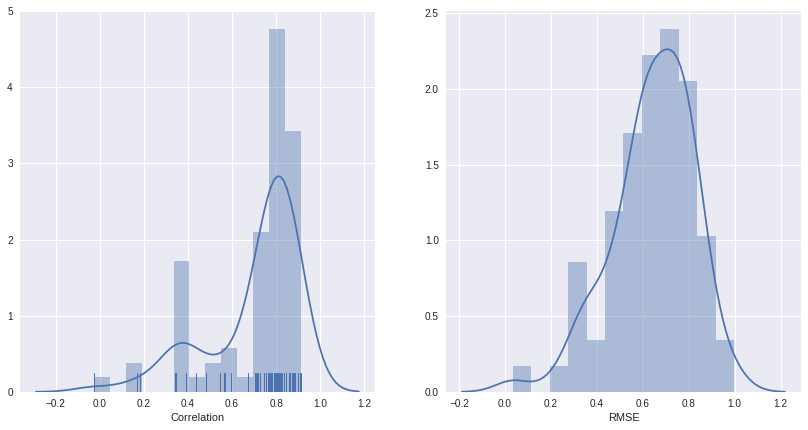

In [100]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
sns.distplot(best_regression_df['Correlation'], rug=True, kde=True, ax=axes[0])
sns.distplot(best_regression_df['RMSE'], rug=False, kde=True, ax=axes[1])

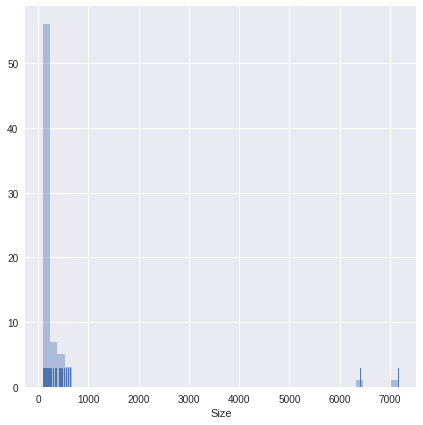

In [99]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
sns.distplot(best_regression_df.Size, rug=True, kde=False, norm_hist=False, ax=axes)

In [80]:
best_regression_df['Estimator'].value_counts()

RBF libSVM folded fingerprints regression        22
Tanimoto Smile SVM regression                    20
Poly Smile SVM fingerprints regression            8
Elastic Net on folded fingerprints regression     8
RBF Smile SVM descriptors regression              5
Weka RF folded fingerprints regression            5
Weka RF descriptors regression                    5
Name: Estimator, dtype: int64

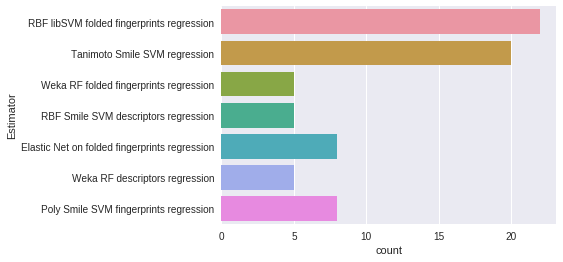

In [81]:
sns.countplot(y='Estimator', data=best_regression_df)

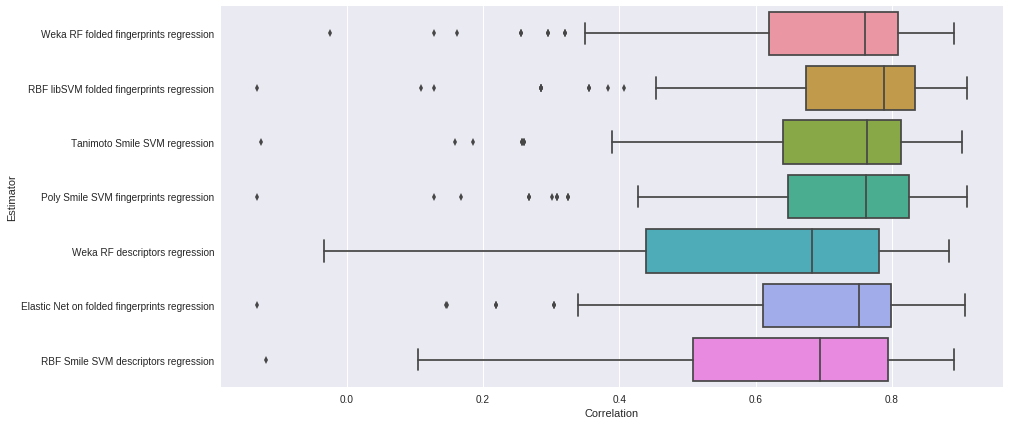

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 7))
sns.boxplot(y='Estimator', x='Correlation', data=regression_df, ax=axes)
#for tick in axes.get_xticklabels():
#    tick.set_rotation(80)

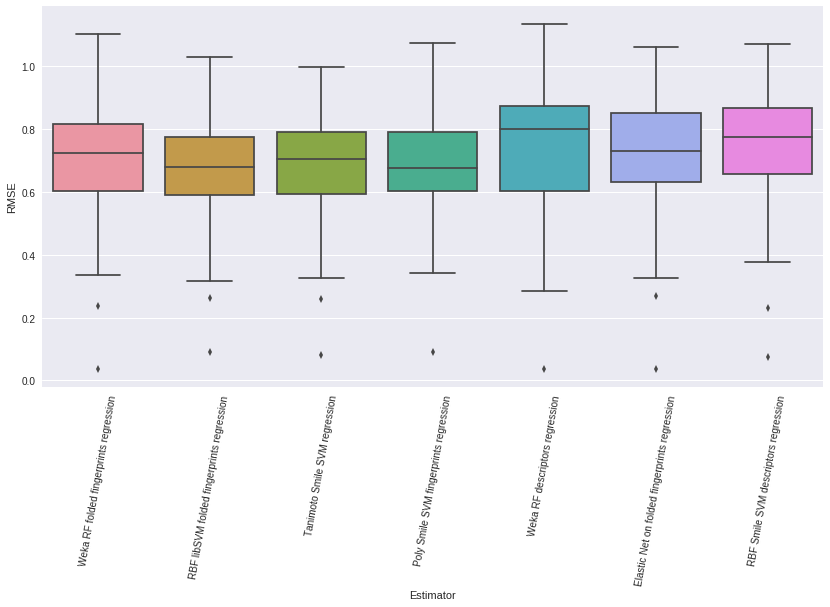

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 7))
sns.boxplot(x='Estimator', y='RMSE', data=regression_df, ax=axes)
for tick in axes.get_xticklabels():
    tick.set_rotation(80)

In [84]:
dirname = os.getcwd()
classification_file = os.path.abspath(os.path.join(dirname, 
                                    'classification_v_1_d_KINASE: GSK Published Kinase Inhibitor Set (PKIS)_p_Kinase Assay.csv'))
classification_df = pd.read_csv(classification_file)
classification_df.sort_values(['GroupName', 'GroupValue'])


,GroupName,GroupValue,Size,Estimator,ROC_AUC,Direction,Threshold
1002,Target (full name),ALK tyrosine kinase receptor,364,Smile SVC Tanimoto classification,0.859883,UP,11.4975
1003,Target (full name),ALK tyrosine kinase receptor,364,Smile SVC Poly classification,0.844893,UP,11.4975
1004,Target (full name),ALK tyrosine kinase receptor,364,Smile Bernoulli NB classification,0.818428,UP,11.4975
1005,Target (full name),ALK tyrosine kinase receptor,364,Weka RF on folded fp classification,0.817920,UP,11.4975
1006,Target (full name),ALK tyrosine kinase receptor,364,Smile SVC RBF classification,0.787898,UP,11.4975
1007,Target (full name),ALK tyrosine kinase receptor,364,Weka RF classification,0.748137,UP,11.4975
198,Target (full name),"AMP-activated protein kinase, alpha-1 subunit",364,Weka RF classification,0.918064,UP,12.7525
199,Target (full name),"AMP-activated protein kinase, alpha-1 subunit",364,Smile SVC RBF classification,0.903540,UP,12.7525
200,Target (full name),"AMP-activated protein kinase, alpha-1 subunit",364,Weka RF on folded fp classification,0.901296,UP,12.7525
201,Target (full name),"AMP-activated protein kinase, alpha-1 subunit",364,Smile Bernoulli NB classification,0.872417,UP,12.7525


In [85]:
max_indices=classification_df.groupby(['GroupName', 'GroupValue'])["ROC_AUC"].idxmax()
best_classification_df=classification_df.loc[max_indices]
best_classification_df.sort_values(['GroupName', 'GroupValue'])

,GroupName,GroupValue,Size,Estimator,ROC_AUC,Direction,Threshold
1002,Target (full name),ALK tyrosine kinase receptor,364,Smile SVC Tanimoto classification,0.859883,UP,11.49750
198,Target (full name),"AMP-activated protein kinase, alpha-1 subunit",364,Weka RF classification,0.918064,UP,12.75250
204,Target (full name),"AMP-activated protein kinase, alpha-2 subunit",364,Smile SVC Poly classification,0.856199,UP,7.91750
216,Target (full name),BR serine/threonine-protein kinase 1,364,Weka RF on folded fp classification,0.905954,UP,12.63250
222,Target (full name),BR serine/threonine-protein kinase 2,364,Smile SVC Tanimoto classification,0.907012,UP,17.30750
228,Target (full name),CaM kinase I delta,364,Smile SVC Tanimoto classification,0.785357,UP,3.44250
234,Target (full name),CaM kinase II alpha,364,Weka RF on folded fp classification,0.709900,UP,5.58000
240,Target (full name),CaM kinase II delta,364,Weka RF classification,0.782309,UP,9.22750
246,Target (full name),CaM kinase IV,364,Weka RF classification,0.699610,UP,2.84500
402,Target (full name),Casein kinase I alpha,364,Weka RF on folded fp classification,0.928946,UP,17.89000


In [86]:
best_classification_df['ROC_AUC'].describe()

count    236.000000
mean       0.841171
std        0.097178
min        0.534892
25%        0.794906
50%        0.871126
75%        0.905975
max        0.978955
Name: ROC_AUC, dtype: float64

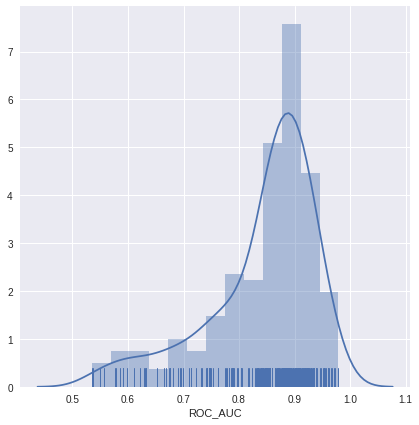

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
sns.distplot(best_classification_df['ROC_AUC'], rug=True, kde=True, ax=axes)

In [88]:
best_classification_df['Estimator'].value_counts()

Weka RF on folded fp classification    74
Smile Bernoulli NB classification      55
Smile SVC Tanimoto classification      39
Weka RF classification                 30
Smile SVC Poly classification          25
Smile SVC RBF classification           13
Name: Estimator, dtype: int64

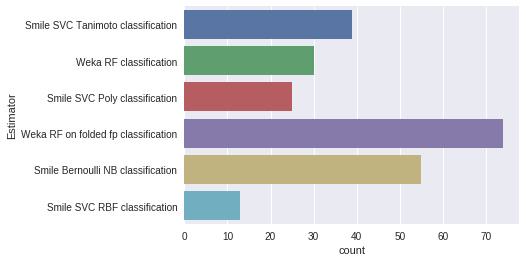

In [89]:
sns.countplot(y='Estimator', data=best_classification_df)

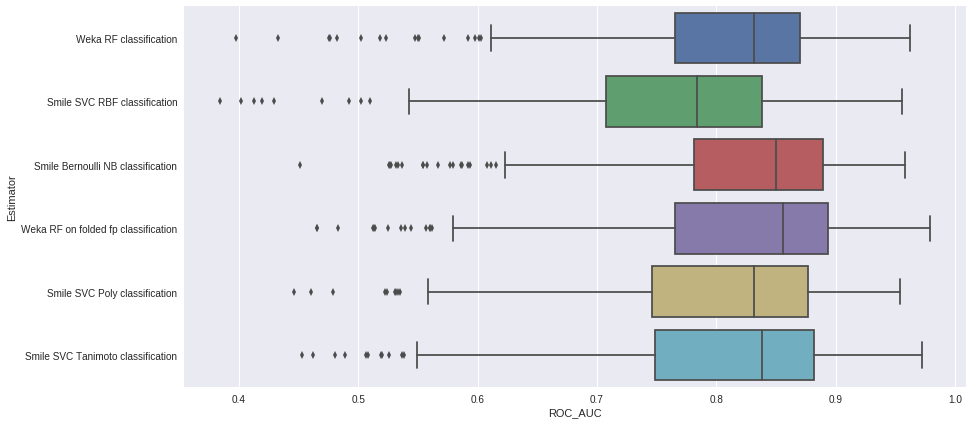

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 7))
sns.boxplot(y='Estimator', x='ROC_AUC', data=classification_df, ax=axes)